In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
import pandas as pd
df = pd.read_csv('A2Q1.csv', header=None)

In [24]:
X = np.array(df) # Store the dataset in a numpy array

In [38]:
def f(x, p):  # Calculate function value of Bernoulli Distribution
  ans=1       # Initialize a variable
  for j in range(x.shape[0]):  # Iterate over all features
    if x[j]==1:
      ans *= p[j]
    else:
      ans *= (1-p[j])
  return ans

In [26]:
def expectation(X, p, pi):    # Expectation Step of the EM Algorithm
  lamda = np.zeros((X.shape[0],4))  # Initialize a matrix
  for i in range(X.shape[0]):
    sum=0
    for k in range(4):
      g = f(X[i],p[k])*pi[k]  # Find the function value
      sum = sum + g           # Sum them up in a separate value
      lamda[i][k] = g
    if sum != 0:
      lamda[i] = lamda[i]/sum # Divide by the total sum
  return lamda

In [27]:
def maximization(X, lamda):   # Maximization Step of the EM ALgorithm
  pi = np.zeros(4)            # Initialize
  p = np.zeros((4,X.shape[1]))

  for k in range(4):          # Calculate the new values of pi
    for i in range(X.shape[0]):
      pi[k] = pi[k] + lamda[i][k]

  for k in range(4):          # Calculate the new values of p
    for j in range(50):
      for i in range(400):
        p[k][j] = p[k][j] + lamda[i][k]*X[i][j]

  for k in range(4):
    if pi[k] != 0:
      p[k] = p[k]/pi[k]

  pi = pi/400

  return pi, p

In [56]:
def log_likelihood(X,pi,p):   # Log Likelihood calculator
  sum = 0
  for i in range(400):
    temp = 0
    for k in range(4):
      temp += f(X[i],p[k])*pi[k]
    if temp > 0:
      sum += math.log(temp)
  return sum

In [52]:
def error(pi_new, p_new, pi, p): # Find error between successive iteration
  err = np.linalg.norm(pi_new-pi)**2
  for i in range(p.shape[0]):
    for j in range(p.shape[1]):
      err = err + (p[i][j] - p_new[i][j])**2
  return err

In [57]:
def EM(X):  # EM Algorithm main code
  pi = np.random.rand(4)  # Randomly initialize
  pi = pi/np.sum(pi)
  p = np.random.rand(4,X.shape[1])
  lamda = np.zeros((X.shape[0],4))

  it=0                  # Iterations variable
  logl=np.array([])     # Log Likelihood to be maintained
  err=1                 # Variable to calculate error

  while it<50:
    lamda_new = expectation(X,p,pi)       # Expectation step
    pi_new, p_new = maximization(X,lamda_new)  # Maximization step
    logl = np.append(logl,log_likelihood(X,pi_new,p_new))
    err = error(pi_new,p_new,pi,p)
    p=p_new                   # Update the new parameters
    pi=pi_new
    lamda = lamda_new
    it = it+1
  obj_loc = obj(X,p,pi)
  return logl, obj_loc   # Return the results

In [58]:
def EM_iter(X):  # EM ALgorithm over 100 random inititalizations
  log_likelihood = np.zeros(50)  # Array to plot log likelihood function
  obj_val = 0
  for i in range(100):
    logl, obj_loc = EM(X)
    log_likelihood = log_likelihood + logl
    obj_val += obj_loc
  return log_likelihood , obj_val

In [59]:
log_likelihood, obj_val = EM_iter(X)  # Run the Algorithm

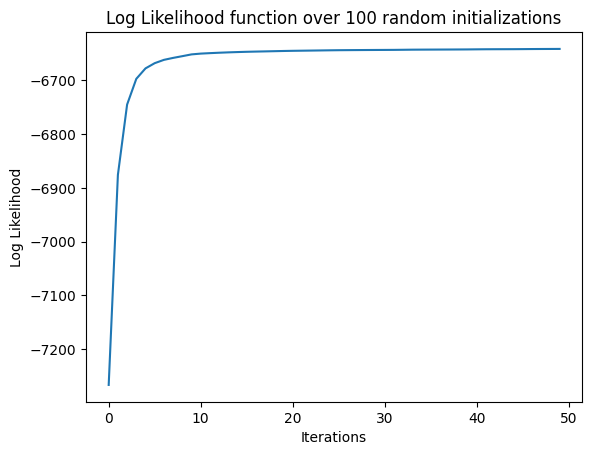

In [45]:
log_likelihood /=100
plt.plot(log_likelihood)

plt.title('Log Likelihood function over 100 random initializations')
plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')
plt.show()

In [46]:
def obj(X,p,pi):  # Objective function
  err=0
  for k in range(4):
    sum=0
    for i in range(400):  # calculate the objective function in a probabilistic manner
      sum += np.linalg.norm(X[i]-p[k])**2
    err += sum*pi[k]
  return err

In [61]:
obj_val /= 100
obj_val  # Output the average objective function value over 100 initializations

28.251075877020075